# THE SPARKS FOUNDATION

# Task - 1 : Prediction using Supervised ML

Predict the percentage of marks of an student based on the number of study hours

Name: Vishesh Bajaj

# STEP 1 - Importing libraries and dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  

In [12]:
df = pd.read_csv("/content/student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# STEP 2- Visualizing the data

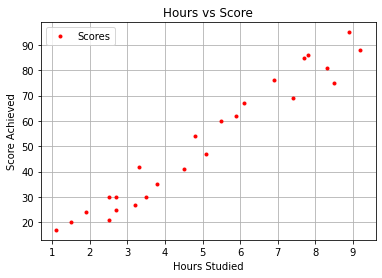

In [13]:
df.plot(x='Hours', y='Scores', style='.', color='red')
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score Achieved')  
plt.grid()
plt.show()

# STEP 3 - Preparing the data & Splitting the dataset

In [14]:
# Here I am using two variables X & Y for Hours and Scores respectively
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1:].values  
X,Y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]), array([[21],
        [47],
        [27],
        [75],
        [30],
        [20],
        [88],
        [60],
        [81],
        [25],
        [85],
        [62],
        [41],
        [42],
        [17],
        [95],
        [30],
        [24],
        [67],
        [69],
        [30],
        [54],
        [35],
        [76],
        [86]]))

In [15]:
# Splitting data into training data and testing data, 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

# STEP 4 - Training the Algorithm

In [16]:
#We have splited our data into training and testing sets, and now we will train our model.

model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Coefficient of our model
model.coef_

array([[9.91065648]])

In [18]:
#Intercept of our model
model.intercept_

array([2.01816004])

# STEP 5 - Visualizing the model

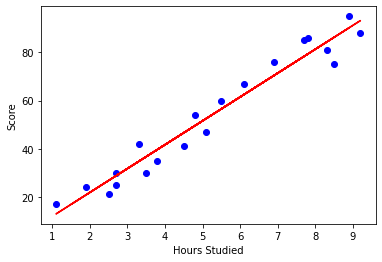

In [19]:
# Plotting the regression line (line = a*x + b)
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.show()
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X, line, color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Score') 
plt.show()

# STEP 6 - Making Predictions

In [20]:
#Here now that we have trained our model, let's test our model on test data
print(X_test) #printing the test data
Y_pred = model.predict(X_test) #Predicting the scores on our test data
print(Y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [21]:
#Now that we have actual and predicted values, let's compare these values
actual = pd.DataFrame(Y_test)
predicted = pd.DataFrame(Y_pred)
compare = pd.concat([actual, predicted], axis = 1, keys = ['Actual_Score', 'Predicted_score'])
compare

,Actual_Score,Predicted_score
,0,0
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
#Testing for any particular no of hours of study 
h = 9.25
pred = model.predict([[h]])
print("No. of hours studied = {}".format(h))
print("Predicted score = {}".format(pred[0]))

No. of hours studied = 9.25
Predicted score = [93.69173249]


# STEP 7 - Evaluating the model

In [23]:
#Now we have our trained model, we tested on our test data, we tested for some random input, noow let's evaluate our model's performance
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982
